In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, RobustScaler, Normalizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\henri\OneDrive\Documentos\EDSA\EDS Bootcamp\Project\Data\HR_DS.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## 1. Preliminary findings
We can see that the dataset was successfull loaded. Starting analysing each column and noting findings

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### 1.1 Available cases/records, missing values and tidying up the dataset
There are no missing values to be found in this dataset. There is both `object` and `int64` columns.

We'll summarize each columns and try to find something more.

In [5]:
# numeric columns
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

There are some columns where there is no variation, so they will not add, at this point, any value to our analysis.
We'll drop these columns.

Besides this the other columns are too far in dimension, so they will need further normalization.

In [6]:
# Remove variables with no variability
non_objs = df.describe().columns.tolist()

noneed=0
list_noneed = []

for col in non_objs:
    if df[col].min() == df[col].max():
        df.drop(columns=[col], inplace=True)
        non_objs.remove(col)
        noneed += 1
        list_noneed.append(col)

if noneed == 1: 
    print('The {0} column was droped'.format(list_noneed))
elif noneed > 1:
    print('{0} columns, {1} were droped'.format(noneed, list_noneed))
else:
    print('No columns were removed.')

2 columns, ['EmployeeCount', 'StandardHours'] were droped


Now let's look into the categorical or object columns and examine their properties:

In [7]:
df.describe(include='O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

These columns tell us a different story:
1. Column `Attrition` is the variable to predict in the future and is quite unballanced, meaning that there are few leaving employes than those who stay in the company;
2. It seems that `Gender` is balanced but pending to more males than females;
3. The majority of the employes do overtime as the column `OverTime` shows;
4. Columns `Over18` is a candidate to be dropped, as it only has one unique value;

There is obvious the need to check all the unique values of these columns:

In [8]:
for obj in df.describe(include='O').columns.tolist():
    print('Column ', obj, ' has unique values --> ', df[obj].unique())

Column  Attrition  has unique values -->  ['Yes' 'No']
Column  BusinessTravel  has unique values -->  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Column  Department  has unique values -->  ['Sales' 'Research & Development' 'Human Resources']
Column  EducationField  has unique values -->  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Column  Gender  has unique values -->  ['Female' 'Male']
Column  JobRole  has unique values -->  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Column  MaritalStatus  has unique values -->  ['Single' 'Married' 'Divorced']
Column  Over18  has unique values -->  ['Y']
Column  OverTime  has unique values -->  ['Yes' 'No']


For sake of simplicity further on our analysis/exploration, we'll clean these unique values and drop the columns we don't need:

In [9]:
# Remove objects with no variation
objects = df.describe(include='O').columns.tolist()

noneed=0
list_noneed = []

for col in objects:
    if len(df[col].unique()) == 1:
        df.drop(columns=[col], inplace=True)
        objects.remove(col)
        noneed += 1
        list_noneed.append(col)

if noneed == 1: 
    print('The {0} column was droped.'.format(list_noneed))
elif noneed > 1:
    print('{0} columns, {1} were droped.'.format(noneed, list_noneed))
else:
    print('No columns were removed.')

The ['Over18'] column was droped.


In [10]:
patterns = [' ', 'Travel_', '-', '&']
for p in patterns:
    df[objects] = df[objects].apply(lambda x: x.str.replace(p, ''))
    print('Pattern "{}" cleared.'.format(p))

Pattern " " cleared.
Pattern "Travel_" cleared.
Pattern "-" cleared.
Pattern "&" cleared.


In [11]:
for obj in objects:
    print('Column ', obj, ' has unique values --> ', df[obj].unique())

Column  Attrition  has unique values -->  ['Yes' 'No']
Column  BusinessTravel  has unique values -->  ['Rarely' 'Frequently' 'NonTravel']
Column  Department  has unique values -->  ['Sales' 'ResearchDevelopment' 'HumanResources']
Column  EducationField  has unique values -->  ['LifeSciences' 'Other' 'Medical' 'Marketing' 'TechnicalDegree'
 'HumanResources']
Column  Gender  has unique values -->  ['Female' 'Male']
Column  JobRole  has unique values -->  ['SalesExecutive' 'ResearchScientist' 'LaboratoryTechnician'
 'ManufacturingDirector' 'HealthcareRepresentative' 'Manager'
 'SalesRepresentative' 'ResearchDirector' 'HumanResources']
Column  MaritalStatus  has unique values -->  ['Single' 'Married' 'Divorced']
Column  OverTime  has unique values -->  ['Yes' 'No']


### 1.2 Distribution and insights of data
Now we look into the distribution of data and check what can be said about it.

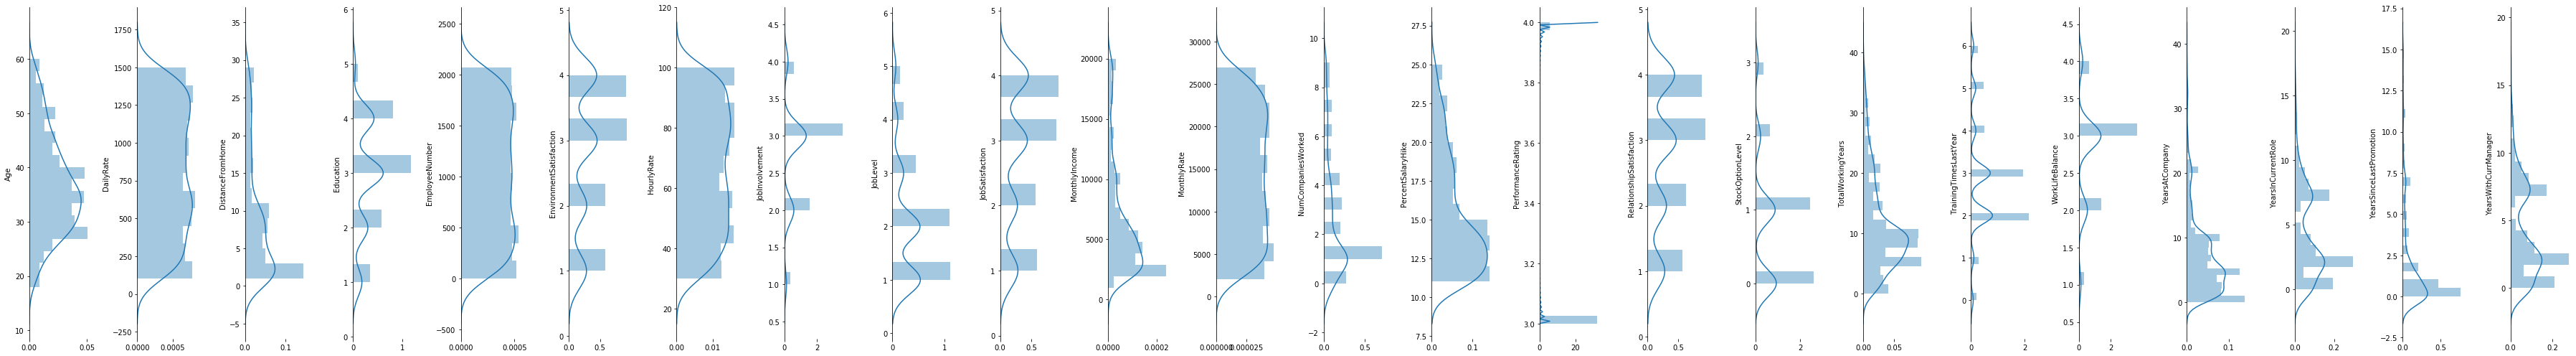

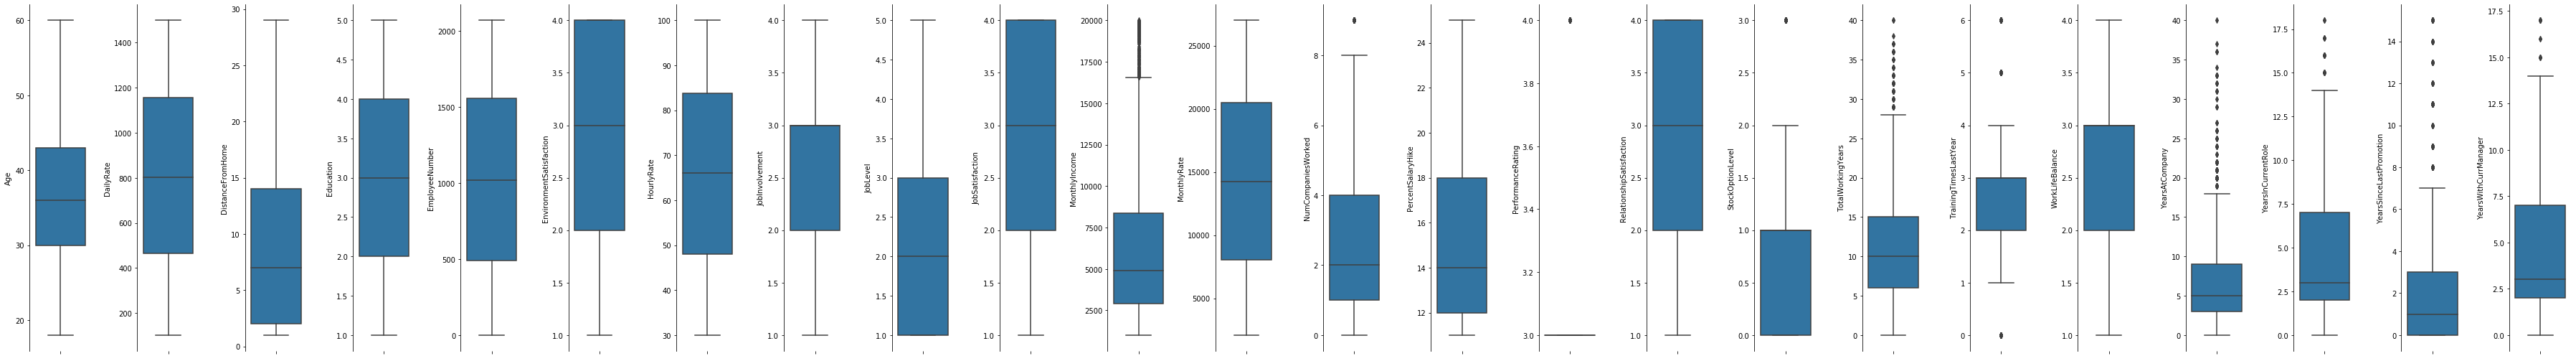

In [12]:
fig, axes = plt.subplots(ncols=len(non_objs), figsize=(50,7))
for ax, col in zip(axes, df[non_objs]):
    sb.distplot(df[col], ax=ax, vertical=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=len(non_objs), figsize=(50,7))
for ax, col in zip(axes, df[non_objs]):
    sb.boxplot(df[col], ax=ax, orient='v')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()
plt.show()

We can check some facts here:
* Most of our data (`DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYear`, `YearsAtCompany`, `YearsSinceLastPromotion`)seems left skewed, and not normal (shapiro-wilk test??)
* Columns like `YearsWithCurrManager` and `YearsInCurrentRole` seem to have 2 diferent distributions with a cutoff by 5 years #Explore
* In terms of outliers, with closer analysis of the boxplots:
 * `MonthlyIncome` seems to have outliers in values above 17500
 * `NumCompaniesWorked`, above 8 companies
 * `PerformanceRating`, rating 4
 * `StockOptions`, level 3
 * `TotalWorkingYears`, above 30 years
 * `TrainingTimesLastYear`, outside of 1 to 4 trainings
 * `YearsAtCompany`, above 20 years
 * `YearsInCurrentRole`, above 15 years
 * `YearsSinceLastPromotion`, above 8 years
 * `YearsWithCurrManager`, above 15 years
 
We'll dive into more details of our label `Attrition` (when its value is "YES") to check if there's any other pattern of these numerical variables and the categorical variables

In [13]:
non_objs

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Younger employees leave more in all categories except SalesExecutive, ManufacturingDirector, Manager, Divorced
* Gender important when:
 * BusinessTravel = NonTravel
 * EducationField = Other
 * JobRole = ManufacturingDirector
 * JobRole = HealthcareRepresentative

Distant workers leave more when:
* NonTravelers and Rarely

# TODO

standardscaler

catplot --> pointplot

attrition vs scale of categories

hue = gender

In [14]:
minmax = MinMaxScaler()
df_pre_ss = pd.concat([df[objects], pd.DataFrame(minmax.fit_transform(df[non_objs]), columns=df[non_objs].columns)], axis=1, sort=False)
df_melted_pre_ss = pd.melt(df_pre_ss, id_vars=objects, value_vars=non_objs, var_name="Var_nonObj", value_name="std_values")

In [35]:
objects

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

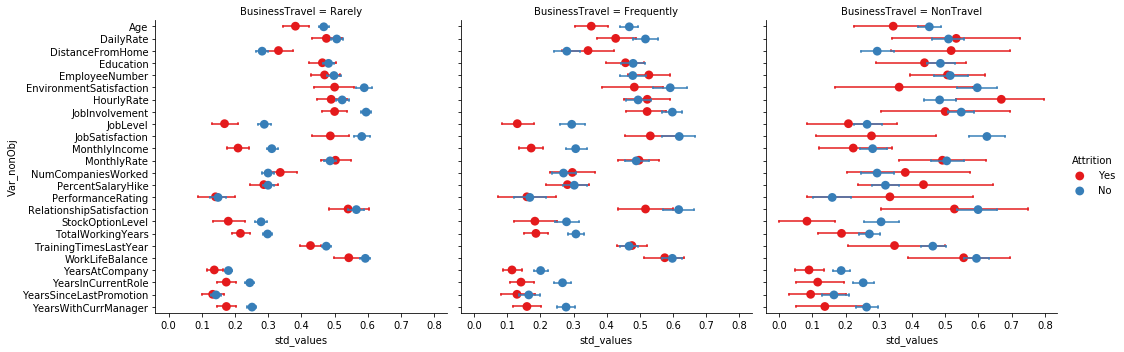

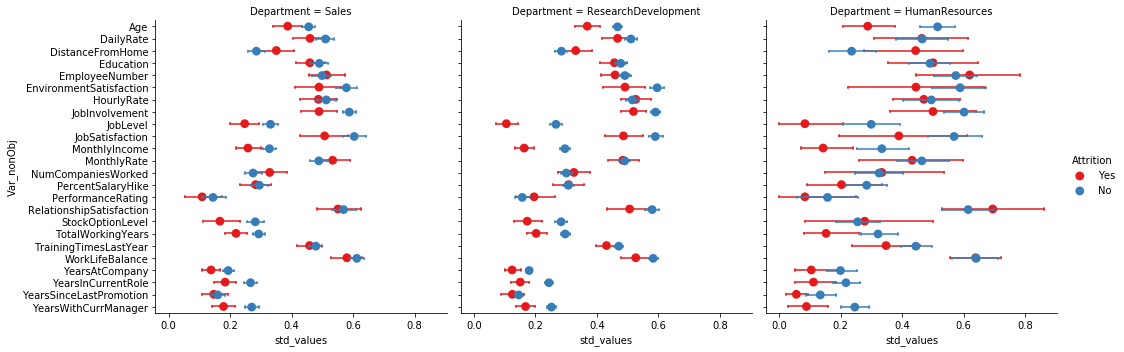

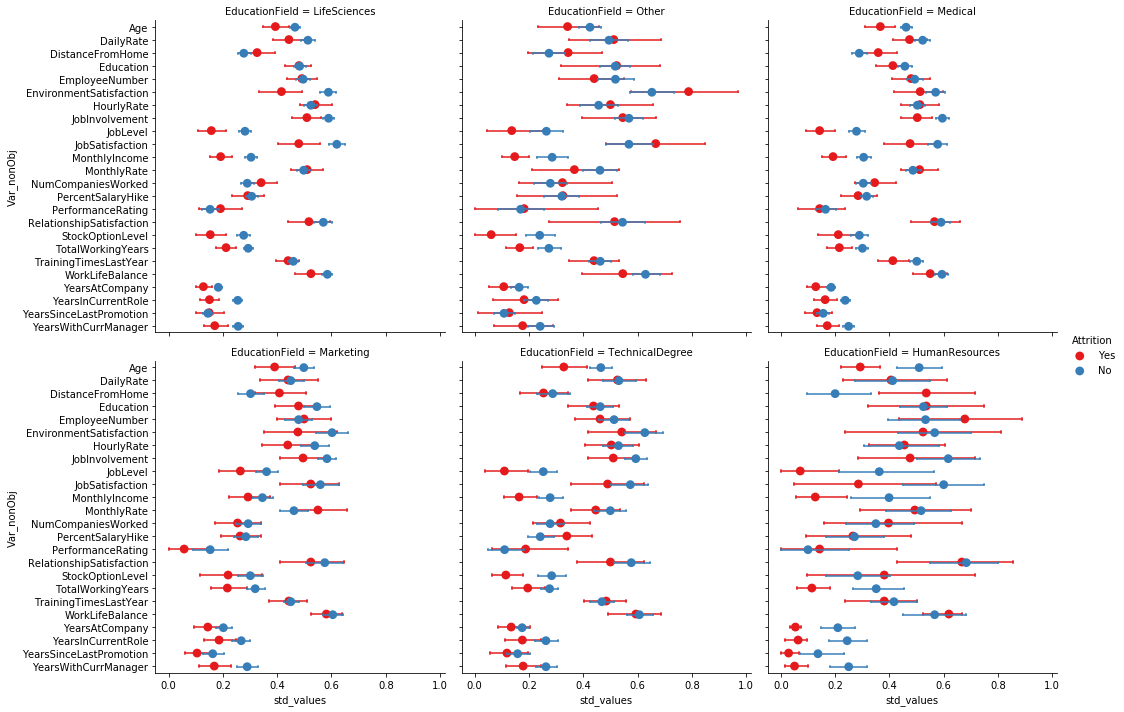

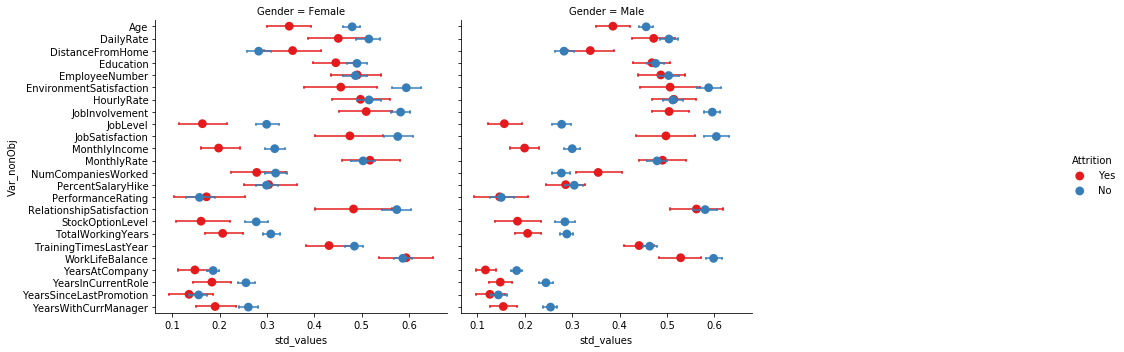

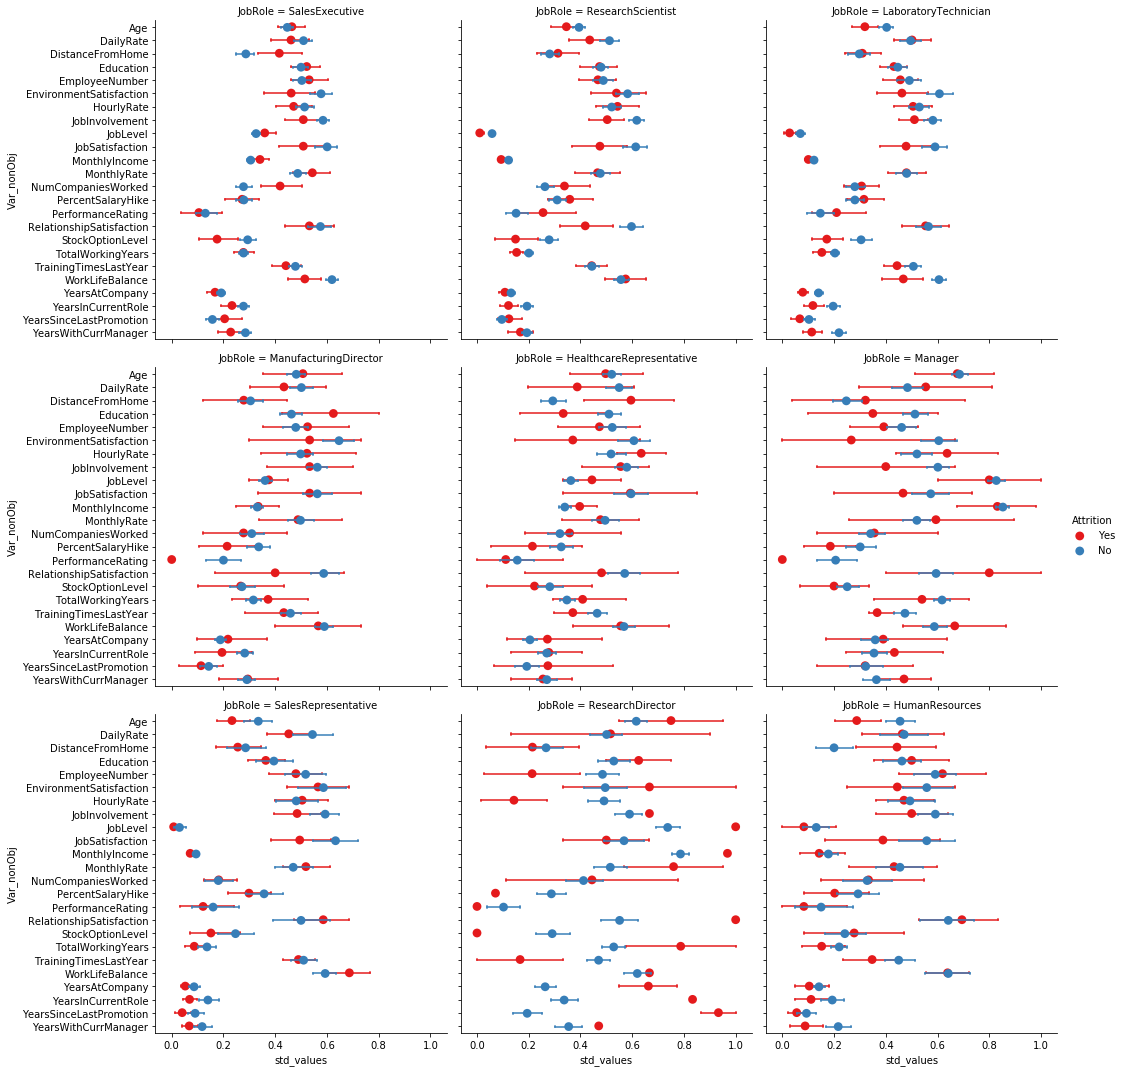

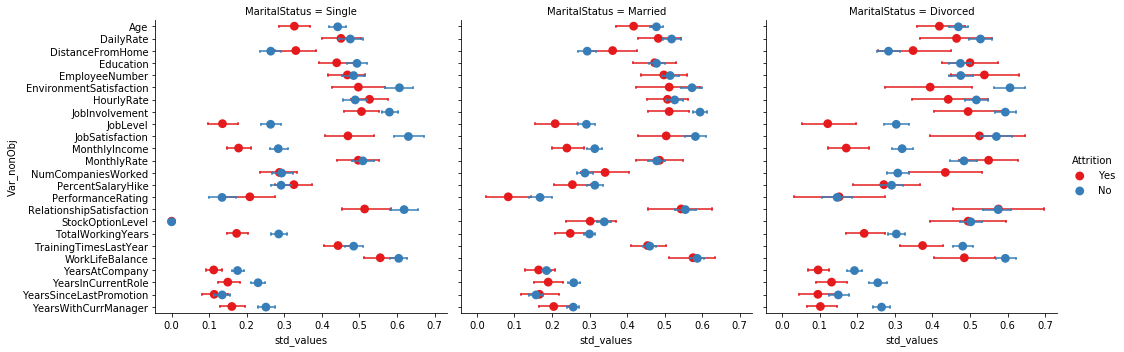

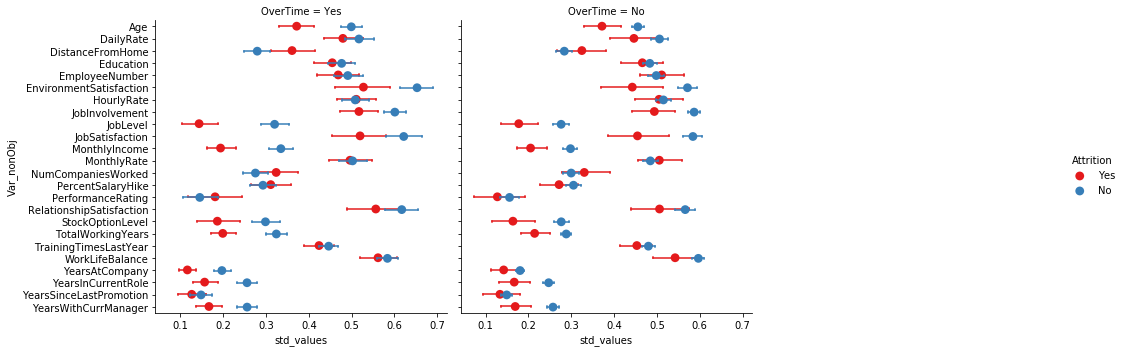

In [44]:
for obj in objects[1:]:
    sb.catplot(x='std_values',
               y='Var_nonObj',
               hue='Attrition',
               data=df_melted_pre_ss, 
               row=None, 
               col=obj, 
               col_wrap=3,
               estimator= np.mean,
               ci=95, 
               n_boot=1000, 
               units=None, 
               order=None, 
               hue_order=None, 
               row_order=None, 
               col_order=None, 
               kind='point', 
               height=5, 
               aspect=1, 
               orient=None, 
               color=None, 
               palette='Set1', 
               legend=True, 
               legend_out=True, 
               sharex=True, 
               sharey=True, 
               margin_titles=True, 
               **{'linestyles':'',
                  'dodge':True,
                  'capsize':0.1,
                  'errwidth':1.5})
    
plt.show()

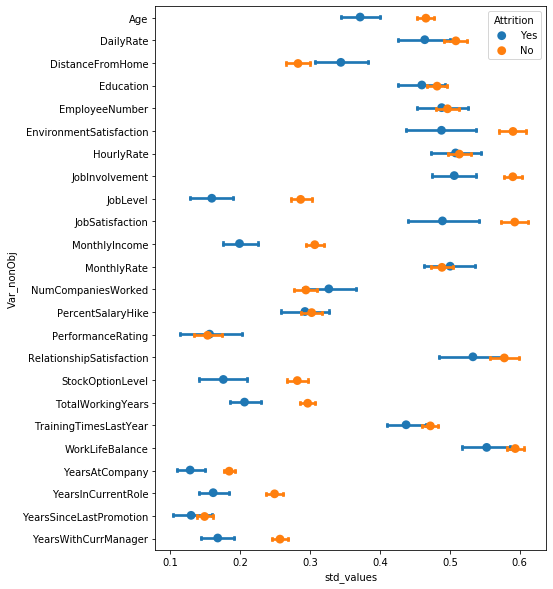

In [29]:
fig = plt.figure(figsize=(7,10))
sb.pointplot(x='std_values', 
             y='Var_nonObj', 
             hue='Attrition',
             data=df_melted_pre_ss, 
             order=None, 
             hue_order=None, 
             ci=95, 
             n_boot=1000, 
             units=None, 
             markers='o', 
             linestyles='', 
             dodge=True, 
             join=True, 
             scale=1, 
             orient=None, 
             color=None, 
             palette=None, 
             errwidth=None, 
             capsize=0.1, 
             ax=None)
plt.show()

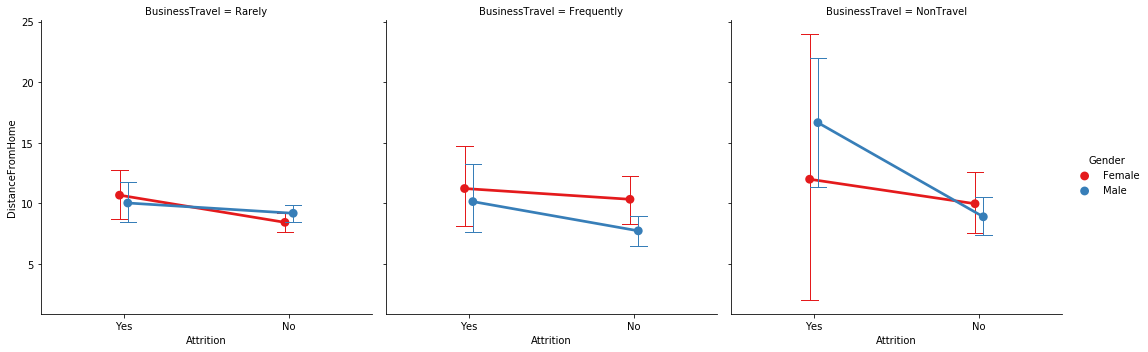

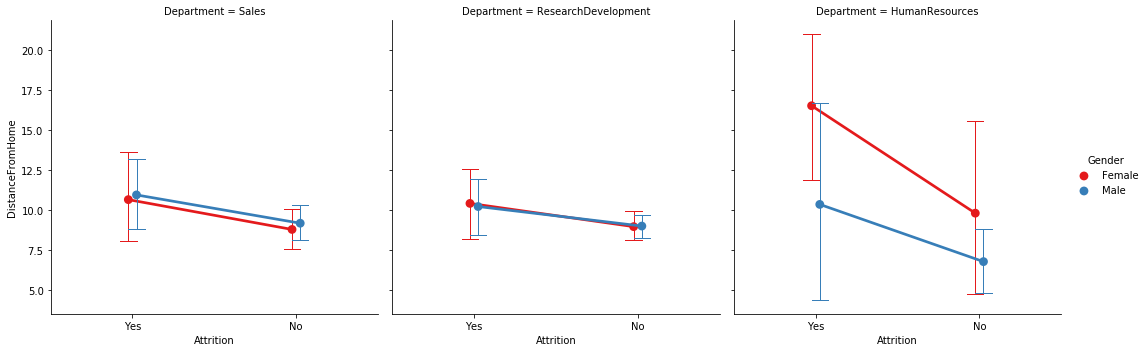

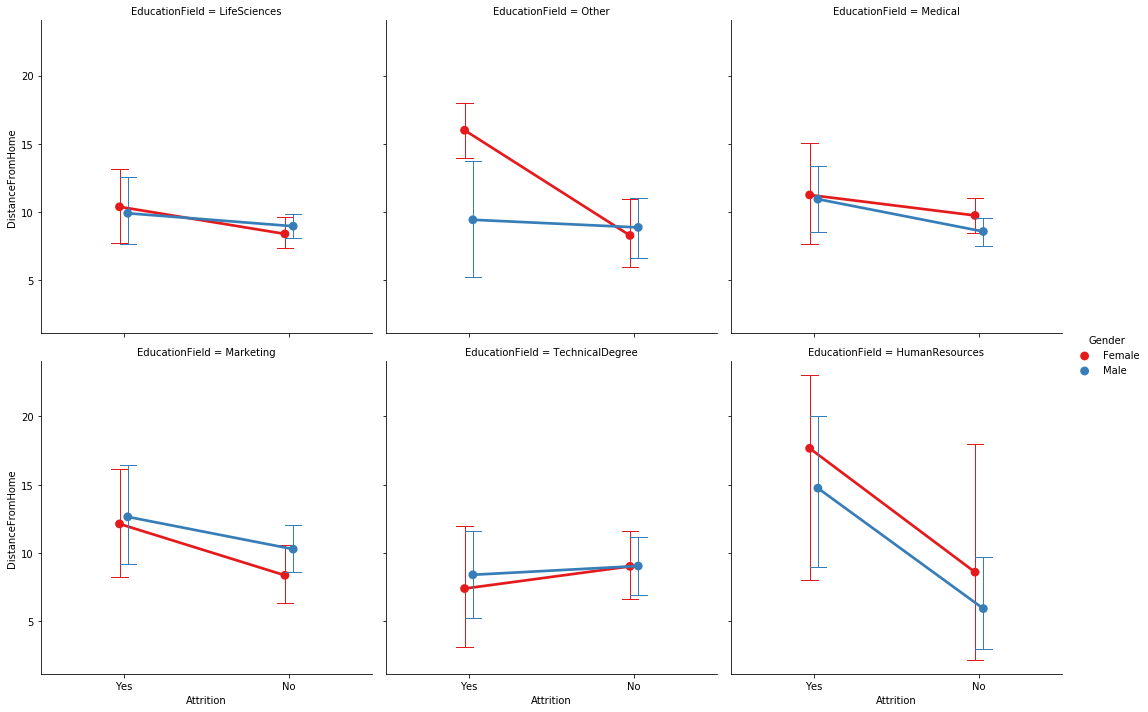

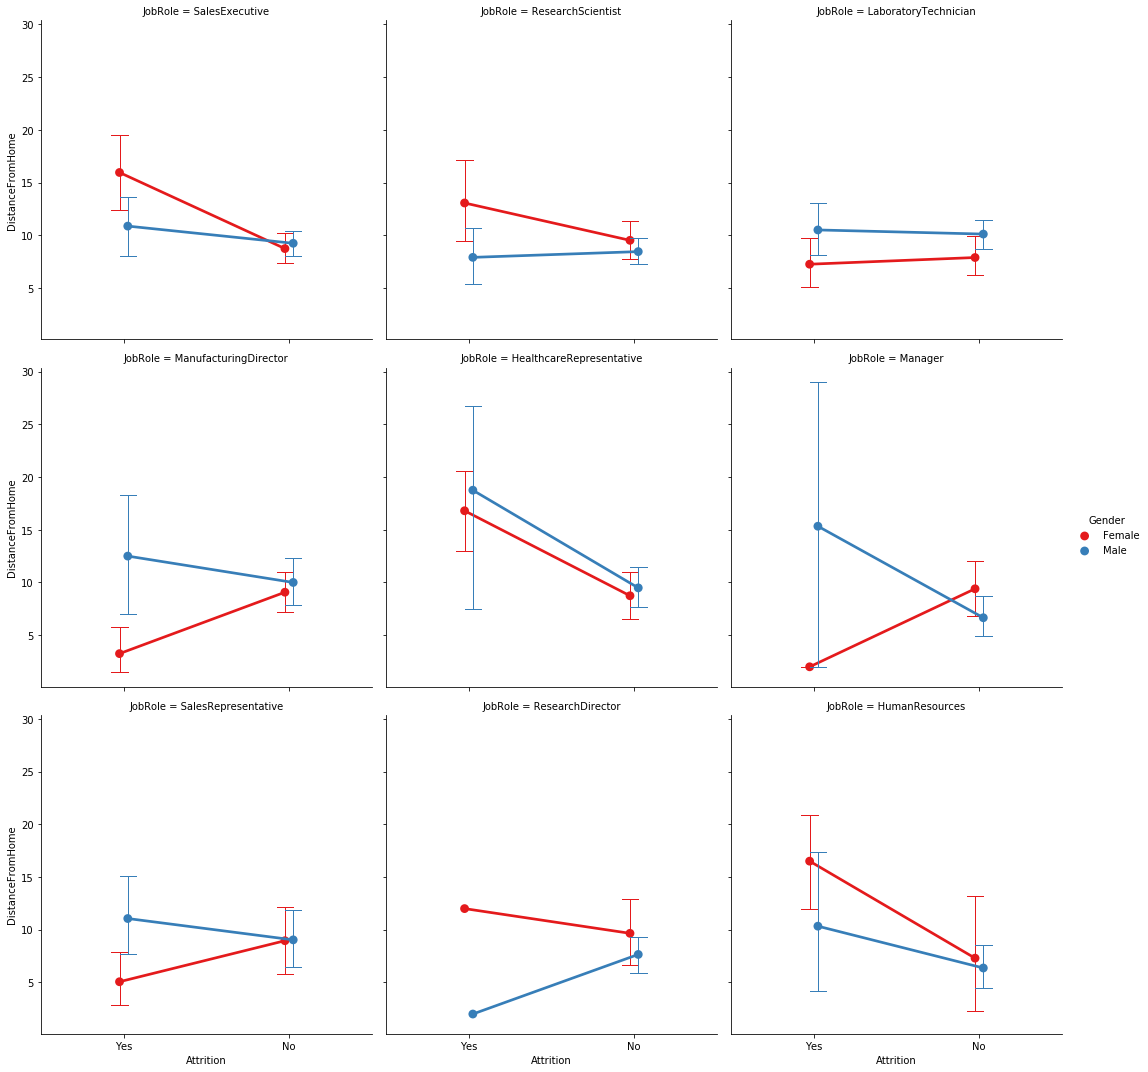

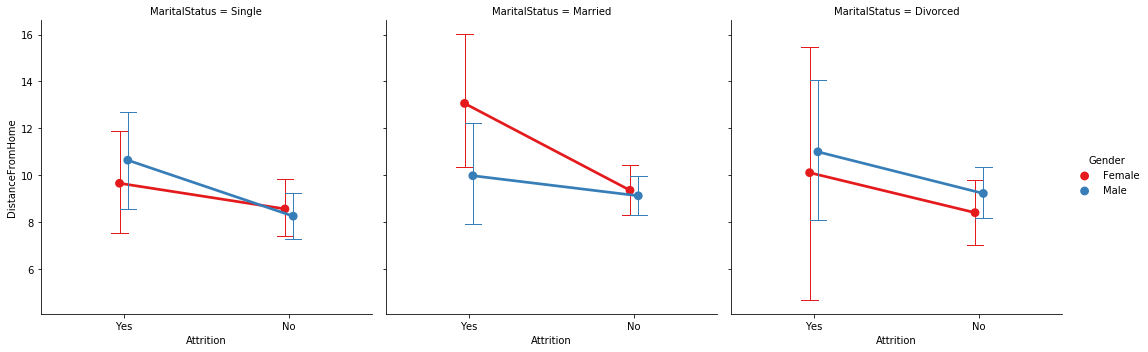

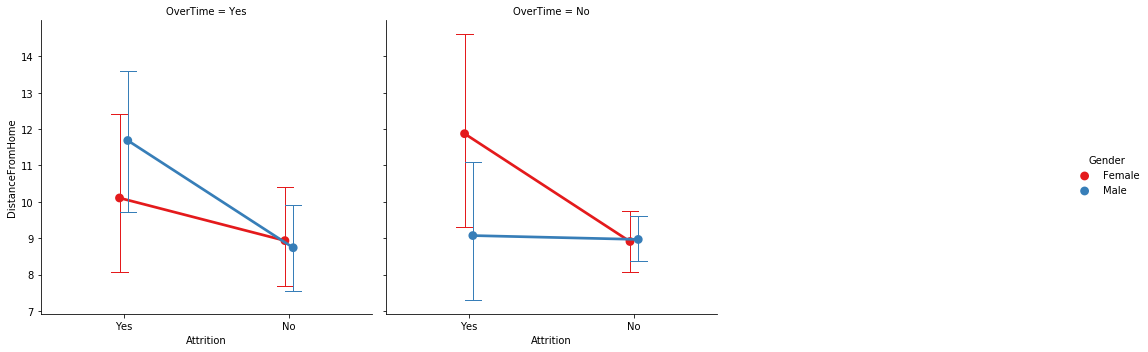

In [28]:
metric = 'DistanceFromHome'

sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='BusinessTravel', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='Department', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='EducationField', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='JobRole', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='MaritalStatus', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
sb.catplot(data=df, x='Attrition', hue='Gender', y=metric, kind='point', col='OverTime', col_wrap=3, palette='Set1', dodge=True,
          linestyle='--', errwidth=1, capsize=.1)
plt.show()

Making some dummies

In [100]:
df_d = pd.get_dummies(df, drop_first=True)

In [116]:
Norm = MinMaxScaler()

In [117]:
df_d_norm = pd.DataFrame(Norm.fit_transform(df_d), columns=df_d.columns)

In [118]:
df_d_norm.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean      0.450567     0.501421          0.292590     0.478231   
std       0.217509     0.288840          0.289531     0.256041   
min       0.000000     0.000000          0.000000     0.000000   
25%       0.285714     0.259843          0.035714     0.250000   
50%       0.428571     0.501074          0.214286     0.500000   
75%       0.595238     0.755190          0.464286     0.750000   
max       1.000000     1.000000          1.000000     1.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean         0.495339                 0.573923     0.512731        0.576644   
std          0.291255                 0.364361     0.290420        0.237187   
min          0.000000                 0.000000     0.000000        0.000000   
25%          0.237179                 0.333333     0.257143        0.333333   
50%          0.493227                 0.666667     0.514286        0.666667   
75%          0.752177                 1.000000     0.767857        0.666667   
max          1.000000                 1.000000     1.000000        1.000000   

          JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count  1470.000000      1470.000000    1470.000000  1470.000000   
mean      0.265986         0.576190       0.289307     0.490629   
std       0.276735         0.367615       0.247918     0.285797   
min       0.000000         0.000000       0.000000     0.000000   
25%       0.000000         0.333333       0.100158     0.239028   
50%       0.250000         0.666667       0.205898     0.487513   
75%       0.500000         1.000000       0.388099     0.737503   
max       1.000000         1.000000       1.000000     1.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             0.299244           0.300680           0.153741   
std              0.277557           0.261424           0.360824   
min              0.000000           0.000000           0.000000   
25%              0.111111           0.071429           0.000000   
50%              0.222222           0.214286           0.000000   
75%              0.444444           0.500000           0.000000   
max              1.000000           1.000000           1.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000         1470.00000   
mean                   0.570748          0.264626            0.28199   
std                    0.360403          0.284026            0.19452   
min                    0.000000          0.000000            0.00000   
25%                    0.333333          0.000000            0.15000   
50%                    0.666667          0.333333            0.25000   
75%                    1.000000          0.333333            0.37500   
max                    1.000000          1.000000            1.00000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                0.466553         0.587075        0.175204   
std                 0.214878         0.235492        0.153163   
min                 0.000000         0.000000        0.000000   
25%                 0.333333         0.333333        0.075000   
50%                 0.500000         0.666667        0.125000   
75%                 0.500000         0.666667        0.225000   
max                 1.000000         1.000000        1.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         1470.000000              1470.000000           1470.000000   
mean             0.234958                 0.145850              0.242537   
std              0.201285            

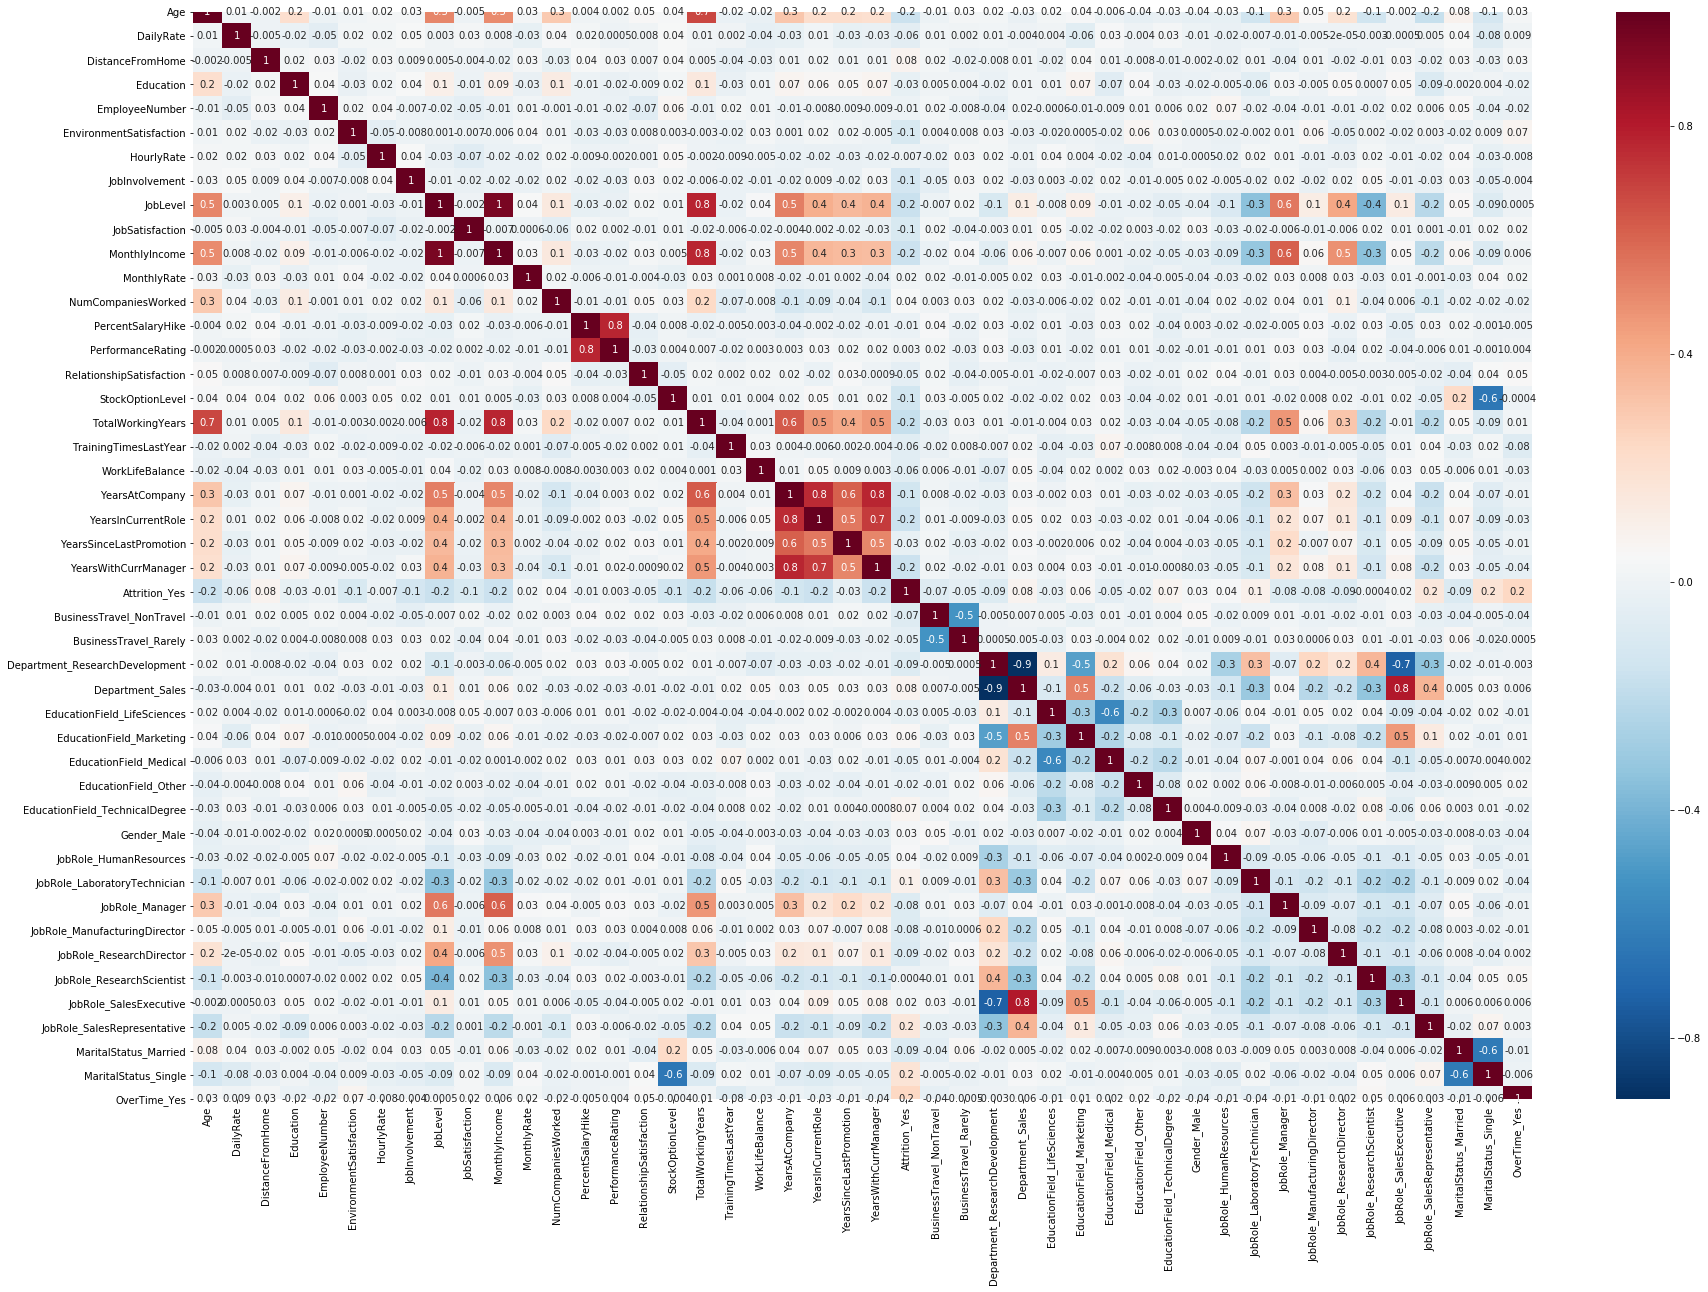

In [119]:
df_d_norm_corr = df_d_norm.corr()
fig = plt.figure(figsize=(30,20))
sb.heatmap(df_d_norm_corr, annot=True, fmt = '.1g', cmap="RdBu_r")
plt.show()

In [135]:
df_d_norm_corr[df_d_norm_corr['Attrition_Yes'] > 0]['Attrition_Yes']

DistanceFromHome                  0.077924
MonthlyRate                       0.015170
NumCompaniesWorked                0.043494
PerformanceRating                 0.002889
Attrition_Yes                     1.000000
Department_Sales                  0.080855
EducationField_Marketing          0.055781
EducationField_TechnicalDegree    0.069355
Gender_Male                       0.029453
JobRole_HumanResources            0.036215
JobRole_LaboratoryTechnician      0.098290
JobRole_SalesExecutive            0.019774
JobRole_SalesRepresentative       0.157234
MaritalStatus_Single              0.175419
OverTime_Yes                      0.246118
Name: Attrition_Yes, dtype: float64

In [136]:
sb.pairplot(df_d_norm_corr)